# PERCOBAAN PRAKTIKUM TM 4 DATA MINING

NAMA : NADILA FITRI NOVIARDHANA
NIM : 164221006
KELAS : SD-A1

## NLTK

In [3]:
import nltk

text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

In [4]:

from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [5]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [6]:
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

### Most Common Word

<ipython-input-7-1d81d4b869dc>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_freq_tokens.column = ['Frequency']


<AxesSubplot: xlabel='Key'>

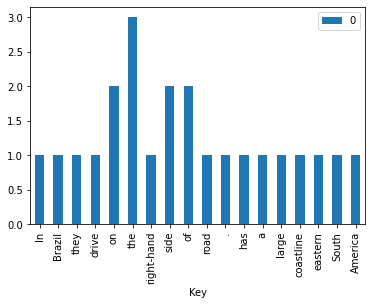

In [7]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(fdist, orient='index')
df_freq_tokens.column = ['Frequency']
df_freq_tokens.index.name='Key'


df_freq_tokens.plot(kind='bar')

### Stopwords Removal

In [9]:
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))

text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

text1 = word_tokenize(text.lower())

print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


### Stemming

In [10]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would lik eto MultiPly my provision, saying tHat without crYing'
print('Sentence: ' , S)

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'SnowBall']
for stemmer_name, stem in zip(names, stemmer_list) :
    if stemmer_name == 'SnowBall' :
        st = stem("english")
    else :
        st = stem()
    print(stemmer_name, ': ', ' '.join(st.stem(s) for s in S.split()))

Sentence:  presumably I would lik eto MultiPly my provision, saying tHat without crYing
Lancaster :  presum i would lik eto multiply my provision, say that without cry
Porter :  presum i would lik eto multipli my provision, say that without cri
SnowBall :  presum i would lik eto multipli my provision, say that without cri


### Lemmatization

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


### Pos Tagging

In [12]:
# Contoh POS tags dengan NLTK (bahasa Inggris)
from nltk import pos_tag
S = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesian Language too'

tokens = word_tokenize(S)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('Language', 'NNP'), ('too', 'RB')]


## TextBlob (Text Binary Large Object)

### Tokenisasi

In [13]:
#contoh tokenisasi dengan textblob
from textblob import TextBlob

T = "Hello, Mr. Man. He smilled!! This, i.e. that, is it."
sentence_tokens= TextBlob(T).sentences

#Tokenisasi Kata
print(TextBlob(T).words)

#Tokenisasi Kalimat
print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smilled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, Mr. Man.', 'He smilled!!', 'This, i.e.', 'that, is it.']


### Stemming dan Lemma

In [14]:
#Stemming dan Lemma
from textblob import Word

#stemming
print("stem: ", Word('running').stem())

#Lemma
print("Lemmatize: ", Word('went').lemmatize('v'))

stem:  run
Lemmatize:  go


### Pos Tagging

In [11]:
#Pos Tagging
for word, pos in TextBlob(T).tags:
    print(word, pos, end=', ')

Hello NNP, Mr. NNP, Man NNP, He PRP, smilled VBD, This DT, i.e NN, that DT, is VBZ, it PRP, 

## Sastrawi

### Stopword Removal

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah"
stop= stopword.remove(kalimat.lower())

print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis & murah


### Lemma

In [15]:
#Lemma
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita berpergian ke Makasssar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))

raya itu bareng dengan saat kita pergi ke makasssar
raya pergi suara


## Word Cloud

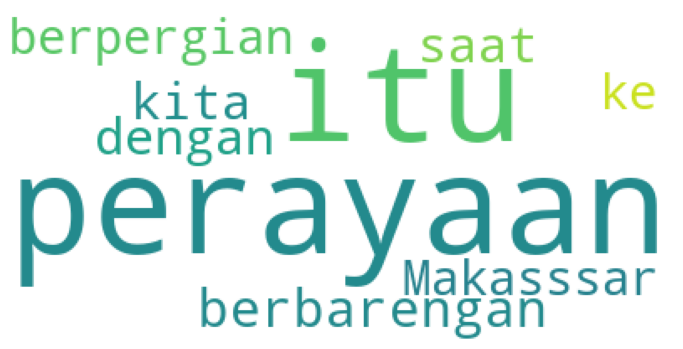

In [16]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white").generate(I)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()



## Clustering

In [17]:
from sklearn.datasets import fetch_20newsgroups
import pickle

# Memuat dataset 20 Newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# Menyimpan dataset ke file .pckl
with open("20newsgroup.pckl", "wb") as f:
    pickle.dump(newsgroups_train, f)

In [18]:
import pickle
import os 
import re 
from sklearn.datasets import fetch_20newsgroups
from nltk import sent_tokenize 
from nltk import word_tokenize 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

src_name = "20newsgroup.pckl" 
src_path = os.path.join(src_name) 
with open(src_path, 'rb') as fin: 
  data = pickle.load(fin)

docs = [doc for doc in data.data] 
label = data.target

def preprocess(doc): 
  sents = word_tokenize(doc) 
  sents_tok = list() # tokenisasi kalimat 
  sents = [t for t in sents if t not in stop_words] 
  for s in sents: 
    s = s.strip().lower() # case folding dan menghilangkan new line 
    s= s.replace("\n", " ") # menggantikan \n dengan spasi 
    s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s) # menghapus simbol 
    s = re.sub(' +', ' ', s) # menghapus repetitive space 
    sents_tok.append(s) 
  return " ". join(sents_tok)

docs_clear = list() 
for d in docs: 
    docs_clear.append(preprocess(d))

print('DONE!')

DONE!


### Ekstraksi Fitur dengan TF-IDF

### KMEANS

In [19]:
# representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df = 2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)
k = 3
seed= 99
km = cluster.KMeans(n_clusters=k, init='random', random_state=seed)
km.fit(X)

C_km= km.predict(X)
C_km

(11314, 55624)


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

### KMEANS++

In [20]:
kmPP = cluster.KMeans(n_clusters=k, init="k-means++", max_iter=300, tol=0.0001, random_state=seed)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)
C_kmpp[:10]

array([0, 2, 2, 2, 0, 1, 0, 2, 2, 2])

### DBSCAN

In [21]:
#DBscan
import numpy as np

dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
C_db[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### Evaluasi

#### Silhouette Score

In [22]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmpp, C_db]

for res in C:
    print(siluet(X, res), end=', ')

0.0007896207726377272, 0.0018247801160533044, -0.006391458130774029, 

#### Homogeneity SCore

In [23]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
    print(purity(label, res), end=', ')

0.12392682286288226, 0.1744812143804512, 0.0021083212671195173, 

#### normalized_mutual_info_score

In [24]:
from sklearn.metrics import normalized_mutual_info_score as NMI

for res in C:
    print(NMI(label, res), end=', ')

0.19329263174114578, 0.2597854850480093, 0.004192160749603887, 

# 2. Jelaskan perbedaan hasil dari Preprocessing menggunakan NLTK, TextBlob dan Sastrawi dan berikan contohnya.

## NLTK

In [4]:
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer()

text = "In Brazil, they drive on the right-hand side of the road. has a large coastline on the eastern side of South America."

tokens = nltk.word_tokenize(text)

stemmed_words = [ps.stem(word) for word in tokens]
print(stemmed_words)


['in', 'brazil', ',', 'they', 'drive', 'on', 'the', 'right-hand', 'side', 'of', 'the', 'road', '.', 'ha', 'a', 'larg', 'coastlin', 'on', 'the', 'eastern', 'side', 'of', 'south', 'america', '.']


## TextBlob

In [2]:
from textblob import TextBlob

text = "In Brazil, they drive on the right-hand side of the road. has a large coastline on the eastern side of South America."

blob = TextBlob(text)
tokens = blob.words
lemmas = [word.lemmatize() for word in tokens]
print(lemmas)

['In', 'Brazil', 'they', 'drive', 'on', 'the', 'right-hand', 'side', 'of', 'the', 'road', 'ha', 'a', 'large', 'coastline', 'on', 'the', 'eastern', 'side', 'of', 'South', 'America']


## Sastrawi

In [3]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

text_id = "Di Brasil, mereka mengemudi di sisi kanan jalan. Brasil juga memiliki garis pantai yang panjang di sisi timur Amerika Selatan."
stemmed_text = stemmer.stem(text_id)
print(stemmed_text)


di brasil mereka kemudi di sisi kanan jalan brasil juga milik garis pantai yang panjang di sisi timur amerika selatan


Dari percobaan tersebut diketahui bahwa NLTK tidak dapat melakukan Lemma, dan Textblob tidak dapat melakukan stemming. Sama Halnya dengan sastrawi yang hanya bisa melakukan stemming. Selain itu dilihat pula dari penggunaan bahasa dimana Sastrawi hanya bisa menggunakan bahasa Indonesia dan 2 lainnya menggunakan bahasa Inggris. 

Selain itu, sastrtawi tidak bisa melakukan fungsi tokenisasi secara langsung.